In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [2]:
train_dir = os.path.join("dataset/seg_train/seg_train")
test_dir = os.path.join("dataset/seg_test/seg_test")
labels=['buildings','forest','glacier','mountain','sea','street']

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                  )

val_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               #target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = val_datagen.flow_from_directory(test_dir,
                                           target_size=(150,150),
                                           #target_size=(224,224),
                                           batch_size=32,
                                           shuffle=False,
                                           class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [4]:
import random
import matplotlib.pyplot as plt
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');
    return img

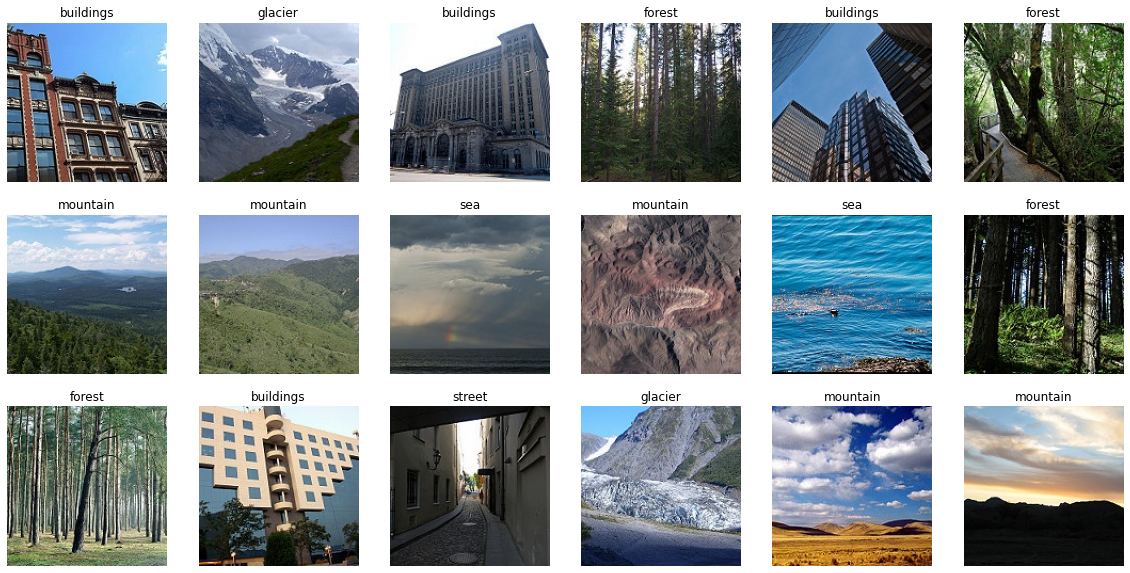

In [5]:
plt.figure(figsize=(20, 10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(labels)
    img = view_random_image(target_dir='dataset/seg_train/seg_train/',
                  target_class=class_name)

#### VGG-16 Test

In [7]:
#model_1 = Sequential()
#model_1.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model_1.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model_1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model_1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model_1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model_1.add(Flatten())
#model_1.add(Dense(units=4096,activation="relu"))
#model_1.add(Dense(units=4096,activation="relu"))
#model_1.add(Dense(units=6, activation="softmax"))

#opt = Adam(lr=0.001)
#model_1.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

#model_1.summary()

In [9]:
#from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
#history_1 = model_1.fit_generator(steps_per_epoch=100,generator=train_data, validation_data=test_data, validation_steps=10,epochs=10),callbacks=[checkpoint,early])

#### Model Definition

In [6]:
model_1 = Sequential()
model_1.add(layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3)))
model_1.add(layers.MaxPool2D())
model_1.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model_1.add(layers.MaxPool2D())
model_1.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model_1.add(layers.MaxPool2D())
model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(6, activation='softmax'))

model_1.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [8]:
history_1 = model_1.fit(train_data,
                    epochs=10,
                    batch_size=32,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data)
                    )

Epoch 1/10
439/439 [==============================] - 239s 539ms/step - loss: 1.0891 - accuracy: 0.5700 - val_loss: 0.9218 - val_accuracy: 0.6567
Epoch 2/10
439/439 [==============================] - 167s 381ms/step - loss: 0.8180 - accuracy: 0.6892 - val_loss: 0.6372 - val_accuracy: 0.7740
Epoch 3/10
439/439 [==============================] - 174s 396ms/step - loss: 0.6982 - accuracy: 0.7414 - val_loss: 0.5951 - val_accuracy: 0.7807
Epoch 4/10
439/439 [==============================] - 183s 416ms/step - loss: 0.6258 - accuracy: 0.7750 - val_loss: 0.5242 - val_accuracy: 0.8167
Epoch 5/10
439/439 [==============================] - 173s 394ms/step - loss: 0.5787 - accuracy: 0.7902 - val_loss: 0.4718 - val_accuracy: 0.8323
Epoch 6/10
439/439 [==============================] - 169s 384ms/step - loss: 0.5551 - accuracy: 0.8028 - val_loss: 0.5040 - val_accuracy: 0.8240
Epoch 7/10
439/439 [==============================] - 172s 393ms/step - loss: 0.5383 - accuracy: 0.8069 - val_loss: 0.4625 -

In [10]:
model_1.evaluate(test_data)

94/94 [==============================] - 7s 72ms/step - loss: 0.4063 - accuracy: 0.8587


[0.40633195638656616, 0.8586666584014893]

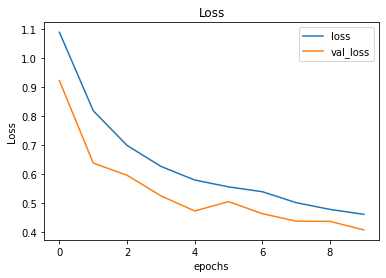

In [11]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss');

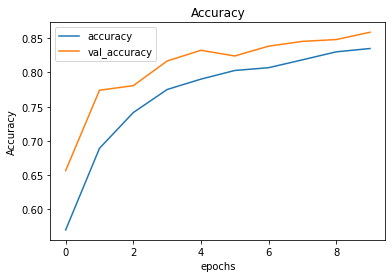

In [12]:
pd.DataFrame(history_1.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
Y_pred = model_1.predict(test_data,len(test_data)/32)
Y_pred=tf.nn.softmax(Y_pred)
Y_pred=np.argmax(Y_pred,axis=1)
I=Y_pred.shape[0]

In [15]:
print('Confusion Matrix')
print(confusion_matrix(test_data.classes[:I], Y_pred))
print('Classification Report')
print(classification_report(test_data.classes[:I], Y_pred, target_names = labels))

Confusion Matrix
[[367   2   3   7   6  52]
 [  3 458   1   4   1   7]
 [  3   3 446  65  29   7]
 [  5   3  59 422  33   3]
 [ 14   4  23  21 438  10]
 [ 39   6   4   3   4 445]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.85      0.84      0.85       437
      forest       0.96      0.97      0.96       474
     glacier       0.83      0.81      0.82       553
    mountain       0.81      0.80      0.81       525
         sea       0.86      0.86      0.86       510
      street       0.85      0.89      0.87       501

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



In [16]:
import seaborn as sns

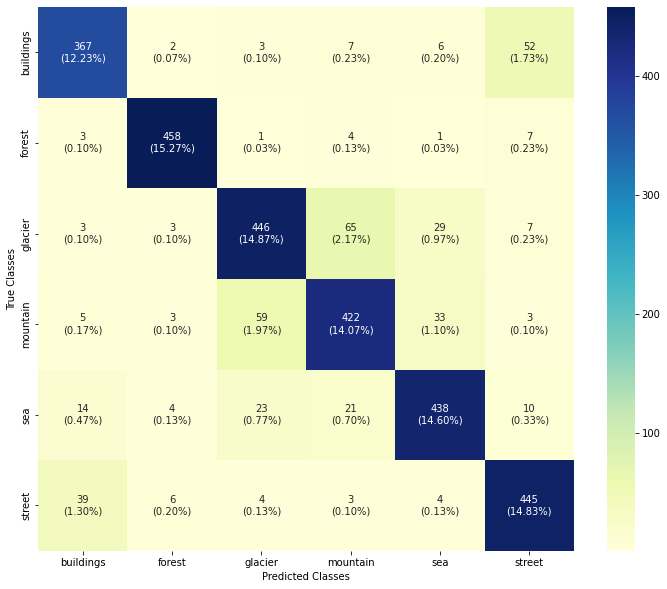

In [17]:
cf_mtx = confusion_matrix(test_data.classes[:I], Y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels, yticklabels=labels,
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [18]:
def show_few_images(number_of_rows=2, model=None):
    figure1, ax1 = plt.subplots(number_of_rows,6, figsize=(20,4*number_of_rows))
    ax1 = ax1.reshape(-1)
    axoff_fun = np.vectorize(lambda ax:ax.axis('off'))
    axoff_fun(ax1)
    axs = 0
    for i, folder in enumerate(os.listdir("dataset/seg_test/seg_test/")):
        image_ids = os.listdir(os.path.join("dataset/seg_test/seg_test/",folder))
        for j in [random.randrange(0, len(image_ids)) for i in range(0,number_of_rows)]:
            display = plt.imread(os.path.join("dataset/seg_test/seg_test/",folder,image_ids[j]))
            plt.axis('off')
            ax1[axs].imshow(display)
            title = 'True:'+folder
            if(model):
                predicted_classname = labels[np.argmax(tf.nn.softmax(model_1.predict(np.array([display]))))]
                title = title+'\nPredict :'+predicted_classname
            ax1[axs].set_title(title)
            axs=axs+1

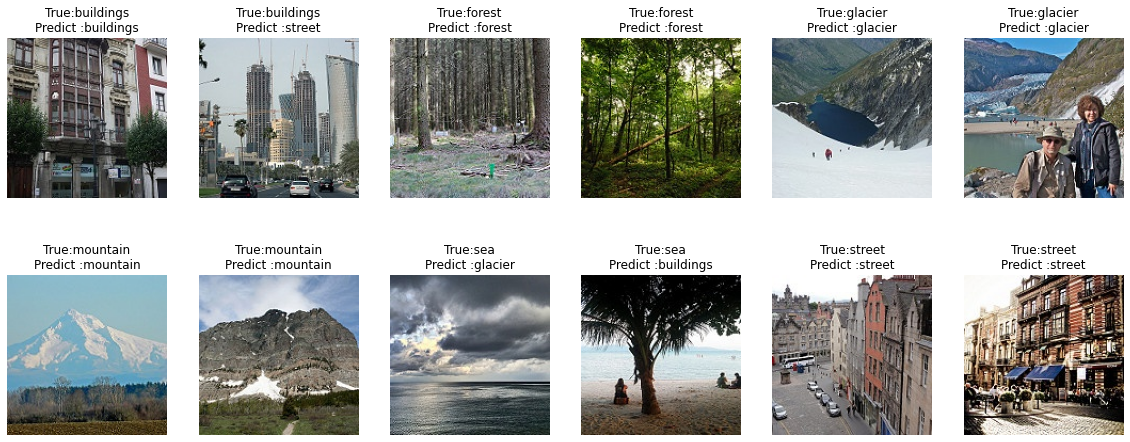

In [19]:
show_few_images(2,model_1)

In [20]:
def load_and_prep_image(filename, img_shape=150, scale=True):
    img = tf.io.read_file(filename)
    img = tf.io.decode_image(img)
    img = tf.image.resize(img, [img_shape, img_shape])
    if scale:
        return img/255.
    else:
        return img

In [21]:
import os
pred_img = os.listdir('dataset/seg_pred/seg_pred/')
import random
custom_images = []
for i in range(10):
    custom_images.append('dataset/seg_pred/seg_pred/'+random.choice(pred_img))

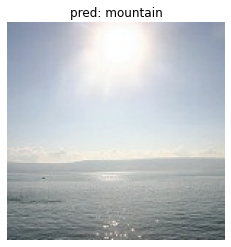

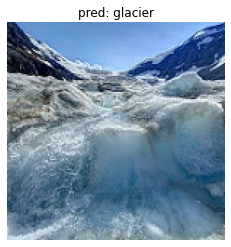

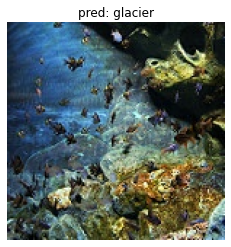

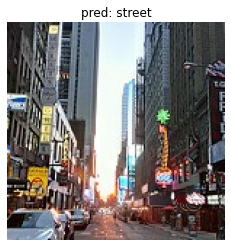

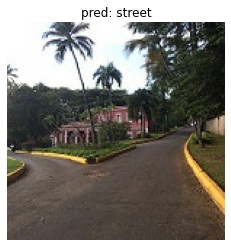

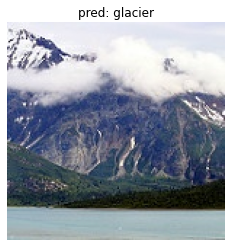

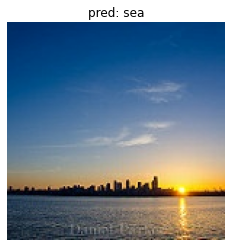

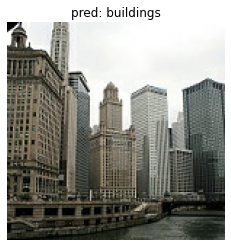

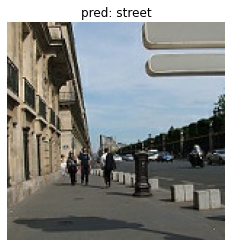

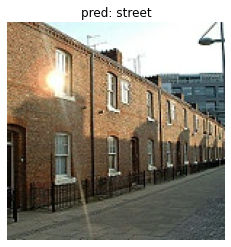

In [23]:
for img in custom_images:
    img = load_and_prep_image(img, scale=False) 
    pred_prob = model_1.predict(tf.expand_dims(img, axis=0)) 
    pred_class = labels[pred_prob.argmax()] 
    plt.figure()
    plt.imshow(img/255.) 
    plt.title(f"pred: {pred_class}")
    plt.axis(False)